In [2]:
import pandas as pd

dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
dataset = dataset.drop("User ID", axis = 1)
dataset = pd.get_dummies(dataset, drop_first = True, dtype = int)
dataset.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

In [4]:
independent = dataset.drop(columns = ['Purchased'])
dependent = dataset[['Purchased']]
dependent.value_counts()

Purchased
0            257
1            143
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x_scaled = scaler.fit_transform(independent)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, dependent, test_size = 0.30, random_state = 0) 
x_train, x_test, y_train, y_test

(array([[-1.11320552, -1.60750566,  1.02020406],
        [ 2.13424088,  0.94723686,  1.02020406],
        [ 0.03295203,  1.24088543, -0.98019606],
        [ 0.22397829,  1.09406114,  1.02020406],
        [ 0.41500455, -0.49164111, -0.98019606],
        [-0.25358736, -0.31545197,  1.02020406],
        [ 0.98808332, -0.84401939,  1.02020406],
        [ 0.98808332,  1.88691227, -0.98019606],
        [ 0.03295203,  1.27025028, -0.98019606],
        [-0.82666613,  2.29802026,  1.02020406],
        [-1.11320552, -1.60750566, -0.98019606],
        [ 2.13424088, -0.81465453,  1.02020406],
        [-1.30423178, -1.49004624,  1.02020406],
        [ 0.41500455,  2.32738512,  1.02020406],
        [ 0.79705706,  0.77104772, -0.98019606],
        [-0.92217926, -0.31545197,  1.02020406],
        [ 0.12846516,  0.77104772,  1.02020406],
        [-0.92217926,  0.56549373,  1.02020406],
        [ 0.31949142,  0.06629116,  1.02020406],
        [ 0.70154394, -1.28449224,  1.02020406],
        [-0.44461362

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [7]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print("Test Accuracy (k=5):.2f}", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n", clf_report)

Test Accuracy (k=5):.2f} 0.9166666666666666
Confusion Matrix:
 [[73  6]
 [ 4 37]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



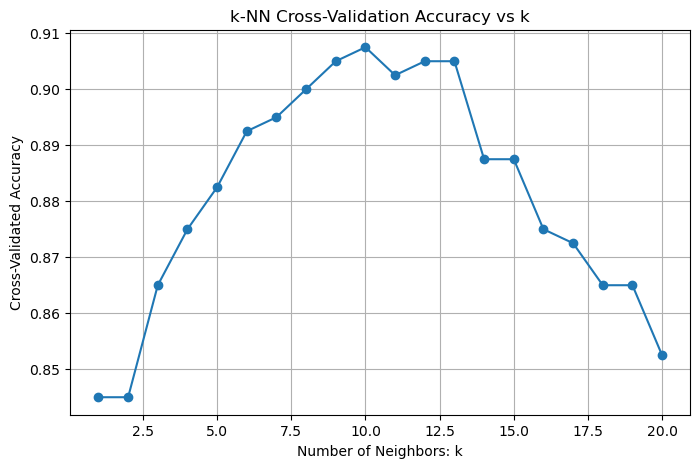

Best k from cross-validation: 10


In [8]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Range of k values to try
k_range = range(1, 21)
cv_scores = []

# Evaluate each k using 5-fold cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_scaled, dependent, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

# Plot accuracy vs. k
plt.figure(figsize=(8, 5))
plt.plot(k_range, cv_scores, marker='o')
plt.title("k-NN Cross-Validation Accuracy vs k")
plt.xlabel("Number of Neighbors: k")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_range[np.argmax(cv_scores)]
print(f"Best k from cross-validation: {best_k}")

In [9]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

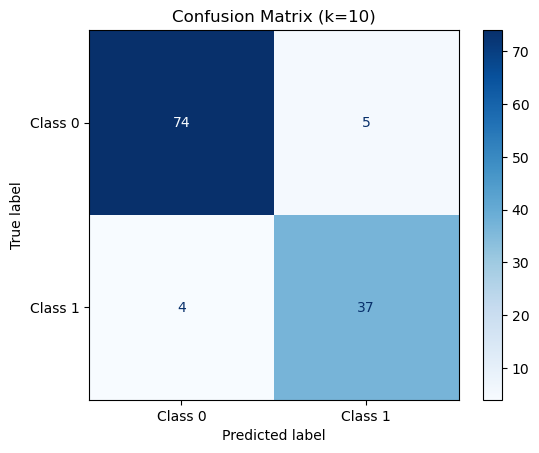

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.94      0.94        79
     Class 1       0.88      0.90      0.89        41

    accuracy                           0.93       120
   macro avg       0.91      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120



In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (k={best_k})")
plt.grid(False)
plt.show()

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

In [11]:
knn.predict([[40,30000,1]])

array([1], dtype=int64)

In [12]:
import pickle as pck
filename = "knn_model.sav"
pck.dump(knn, open(filename, 'wb'))